<a href="https://colab.research.google.com/github/descandon88/tesis_maestria/blob/main/calc_coi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from itertools import count
import json
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/eci/base/base_eci_pci/df_ecm2.csv").copy()
df_rca = pd.read_csv("/content/drive/MyDrive/eci/base/base_eci_pci/df_rca.csv")
df_dcp = pd.read_csv("/content/drive/MyDrive/eci/base/base_eci_pci/df_cpd.csv")

In [ ]:
df.sample(n=10)

,Unnamed: 0,country_name,product_name,product_code,export_value,year,pci,eci,product_short_name,Mcp
1984901,1984901,Qatar,Electronic integrated circuits and microassemb...,8542,6460,1995,1.592074,-0.352610,Electronic integrated circuits,0
188880,188880,Togo,Aluminium foil (whether or not printed or back...,7607,0,2020,2.082373,-1.648869,Aluminum foil < 0.2 mm,0
4344093,4344093,Cuba,Oil-cake and other solid residues; whether or ...,2306,0,2019,-0.575010,-0.791271,Solid vegetable oil and fat residues,0
7364695,7364695,Chile,"Zirconium; articles thereof, including waste a...",8109,10452,2005,3.794615,-0.131584,Zirconium,0
5166779,5166779,Ukraine,Railway or tramway track fixtures and fittings...,8608,16494006,2019,2.374042,0.320509,Railway track fixtures,1
5970166,5970166,Norfolk Island,Swine; live,103,0,1995,1.632134,1.616620,Swine,0
252959,252959,Kiribati,Aluminium; structures (excluding prefabricated...,7610,0,2014,1.337991,0.440253,"Aluminum structures (bridges, towers etc)",0
373675,373675,Saudi Arabia,Antiques; of an age exceeding one hundred years,9706,20331,2020,-1.221259,0.726408,Antiques >100 years,0
2672568,2672568,Uganda,"Glassware of a kind used for table, kitchen, t...",7013,77150,2018,1.526087,-0.743272,Glassware for interior decorative use,0
406289,406289,Dominica,"Articles of apparel, clothing accessories and ...",4303,0,2007,0.381830,0.440329,Furskin apparel,0


In [ ]:
df_rca.sample(n=10)

,Unnamed: 0,year,country_name,product_name,product_short_name,product_code,export_value,RCAcpt,Mcp
296184,296184,1995,St-Martin / St Maarten,"Yarn of carded wool, not put up for retail sale",NaN,0,0.0,0.000000,0
1566103,1566103,2000,Cyprus,Watch cases and parts thereof,Watch cases and parts,9111,0.0,0.000000,0
6614290,6614290,2017,Afghanistan,"Woven fabrics of synthetic staple fibres, cont...",Woven fabrics of < 85% synthetic staple fibers...,5514,0.0,0.000000,0
2835812,2835812,2004,Kenya,"Phenols or phenol-alcohols; halogenated, sulph...",Derivatives of phenols,2908,2413.0,0.011869,0
6468752,6468752,2016,Marshall Islands,"Photographic paper, paperboard and textiles; s...",Photographic paper,3703,0.0,0.000000,0
372701,372701,1996,Ecuador,Starches; inulin,Starches,1108,172181.0,0.140439,0
7104221,7104221,2018,Panama,Slide fasteners and parts thereof,Slide fasteners,9607,26701.0,0.035147,0
647188,647188,1997,China,"Oil seeds; linseed, whether or not broken",Linseed,1204,118937.0,0.008632,0
4229333,4229333,2009,Benin,"Acyclic alcohols and their halogenated, sulpho...",Acyclic alcohols,2905,909.0,0.000977,0
5898100,5898100,2014,New Zealand,Signalling apparatus; electric sound or visual...,Electric sound or visual signaling apparatus,8531,14013841.0,0.292961,0


In [ ]:
df = df[['country_name','product_name','product_code','export_value','year','pci','eci','product_short_name','Mcp']].copy()
df_ec = df[(df['country_name']=='Ecuador')&(df['year']==2017)].copy()
df_2017 = df[(df['year']==2017)].copy()

In [ ]:
df_ec.sample(n=7)
df_2017.head(5)

,country_name,product_name,product_code,export_value,year,pci,eci,product_short_name,Mcp
5024,Afghanistan,Abrasive powder or grain; natural or artificia...,6805,0,2017,3.08353,-1.297002,Natural or artificial abrasive powder,0
5025,Albania,Abrasive powder or grain; natural or artificia...,6805,0,2017,3.08353,-0.288020,Natural or artificial abrasive powder,0
5026,Algeria,Abrasive powder or grain; natural or artificia...,6805,0,2017,3.08353,-0.743123,Natural or artificial abrasive powder,0
5027,American Samoa,Abrasive powder or grain; natural or artificia...,6805,0,2017,3.08353,0.785317,Natural or artificial abrasive powder,0
5028,Andorra,Abrasive powder or grain; natural or artificia...,6805,11279,2017,3.08353,1.131309,Natural or artificial abrasive powder,0


In [ ]:
df_ec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 5087 to 7372396
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_name        1221 non-null   object 
 1   product_name        1221 non-null   object 
 2   product_code        1221 non-null   int64  
 3   export_value        1221 non-null   int64  
 4   year                1221 non-null   int64  
 5   pci                 1221 non-null   float64
 6   eci                 1221 non-null   float64
 7   product_short_name  1221 non-null   object 
 8   Mcp                 1221 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 95.4+ KB


#Calculo de Proximidad

In [ ]:
from itertools import count
from itertools import combinations
from itertools import product

def calc_cppt(data,country_col,product_col):
    """
    Función para el cálculo de las co-ocurrencias en los países
    Retorna:
        Dataframe con valores de co-ocurrencias para cada par de producto
    """

    # Se crea combinaciones dentro del country_col (i.e. paises) por productos (i.e. products)
    dft = (data.groupby(country_col)[product_col].apply(lambda x: pd.DataFrame(list(combinations(x,2))))
            .reset_index(level=1, drop=True)
            .reset_index())
    dft.rename(columns={0:f'{product_col}_1'}, inplace=True)
    dft.rename(columns={1:f'{product_col}_2'}, inplace=True)

    # -- {product_col} 1 X {product_col} 2 == {product_col} 2 X {product_col} 1
    dft2 = dft.copy()
    dft2.rename(columns={f'{product_col}_1':f'{product_col}_2t'}, inplace=True)
    dft2.rename(columns={f'{product_col}_2':f'{product_col}_1'}, inplace=True)
    dft2.rename(columns={f'{product_col}_2t':f'{product_col}_2'}, inplace=True)
    # -- add second half
    dft3 = pd.concat([dft,dft2],axis=0,sort=False)

    # retiro de diagonales en caso de que estén presentes
    dft3 = dft3[ dft3[f'{product_col}_1'] != dft3[f'{product_col}_2'] ]

    # se calcula la cantindad N veces que los {product_col}s ocurren simultáneamente
    dft3['count'] = 1
    dft3 = dft3.groupby([f'{product_col}_1',f'{product_col}_2'],as_index=False)['count'].sum()
    dft3.rename(columns={f'count':f'Cpp'}, inplace=True)

    # Calculo de Ubicuidad
    df_ub = data.groupby(product_col,as_index=False)['Mcp'].sum()

    # merge del calculo de ubicuidad en la matriz de cpp 
    df_ub.rename(columns={f'{product_col}':f'{product_col}_1'}, inplace=True)
    dft3 = pd.merge(dft3,df_ub,how='left',on=f'{product_col}_1')

    df_ub.rename(columns={f'{product_col}_1':f'{product_col}_2'}, inplace=True)
    dft3 = pd.merge(dft3,df_ub,how='left',on=f'{product_col}_2')

    # Toma el min de probabilidades condicionales
    dft3['kpi'] = dft3['Cpp']/dft3['Mcp_x']
    dft3['kpj'] = dft3['Cpp']/dft3['Mcp_y']
    dft3['phi'] = dft3['kpi']
    dft3.loc[dft3['kpj']<dft3['kpi'],'phi'] = dft3['kpj']
    
    return dft3

In [ ]:
# Filtro la base para el año 2017
dft = df_rca[df_rca['year']==2017].copy()

# Se mantienen las combinaciones de país-producto donde Mcp == 1 ( RCAcp> 1)
dft = dft[dft['Mcp']==1]

# Se calcula cpp con la función df_cpp

df_ccpt= calc_cppt(dft,country_col='country_name',product_col='product_name')

print('dataframe de productos co-ocurrentes y aproximados del 2019 se encuentra listo')


dataframe de productos co-ocurrentes y aproximados del 2019 se encuentra listo


In [ ]:
df_ccpt.head(10)

,product_name_1,product_name_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
0,Abrasive powder or grain; natural or artificia...,Acetals and hemiacetals; whether or not with o...,3,23,13,0.130435,0.230769,0.130435
1,Abrasive powder or grain; natural or artificia...,Acids; carboxylic acid with additional oxygen ...,3,23,22,0.130435,0.136364,0.130435
2,Abrasive powder or grain; natural or artificia...,"Acids; polycarboxylic acids, their anhydrides,...",4,23,15,0.173913,0.266667,0.173913
3,Abrasive powder or grain; natural or artificia...,Acids; saturated acyclic monocarboxylic acids ...,5,23,17,0.217391,0.294118,0.217391
4,Abrasive powder or grain; natural or artificia...,"Acids; unsaturated acyclic monocarboxylic, cyc...",7,23,22,0.304348,0.318182,0.304348
5,Abrasive powder or grain; natural or artificia...,Acrylic polymers in primary forms,9,23,18,0.391304,0.500000,0.391304
6,Abrasive powder or grain; natural or artificia...,Activated carbon; activated natural mineral pr...,4,23,27,0.173913,0.148148,0.148148
7,Abrasive powder or grain; natural or artificia...,"Acyclic alcohols and their halogenated, sulpho...",3,23,27,0.130435,0.111111,0.111111
8,Abrasive powder or grain; natural or artificia...,Acyclic hydrocarbons,6,23,28,0.260870,0.214286,0.214286
9,Abrasive powder or grain; natural or artificia...,Agglomerated cork (with or without a binding s...,3,23,8,0.130435,0.375000,0.130435


# Cálculo de COI

## A measure of how many complex products are near a country’s current set of productive capabilities. The COI captures the ease of diversification for a country, where a high COI reflects an abundance of nearby complex products that rely on similar capabilities or know-how as that present in current production. Complexity outlook captures the connectedness of an economy’s existing capabilities to drive easy (or hard) diversification into related complex production, using the Product Space.

## A low complexity outlook reflects that a country has few products that are a short distance away, so will find it difficult to acquire new know-how and increase their economic complexity.

## Technical breakout: To calculate COI we first need to calculate distance of every product to existing production (from 0 to 1). We then sum the ‘closeness,’ i.e. 1 minus the distance to the products that the country is not currently making, weighted by the level of complexity of these products. Formally,

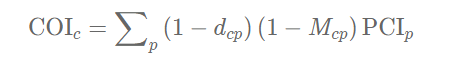





In [22]:
d = {'country_name': ['Ecuador','Ecuador','Ecuador','Ecuador','Ecuador', 'Ecuador','Uruguay','Uruguay','Uruguay','Uruguay','Ecuador','Ecuador'],
     'product_name': ['petroleo', 'petroleo','petroleo','petroleo','mariscos','mariscos','carne','carne','carne','petroleo','plastico','plastico'],
     'dcp':[0.01,0.03,0.02,0.06,0.06,0.03,0.5,0.07,0.06,0.01,0.08,0.09],
     'Mcp': [1,1,1,1,1,1,1,1,1,0,0,0],
     'pci_p':[3.08,3.1,3.010,2.8,1.02,-0.08,0.5,0.3,-0.2,3.1,2.7,2]}
df_tmp = pd.DataFrame(data=d)
df_tmp.head(12)

,country_name,product_name,dcp,Mcp,pci_p
0,Ecuador,petroleo,0.01,1,3.08
1,Ecuador,petroleo,0.03,1,3.10
2,Ecuador,petroleo,0.02,1,3.01
3,Ecuador,petroleo,0.06,1,2.80
4,Ecuador,mariscos,0.06,1,1.02
5,Ecuador,mariscos,0.03,1,-0.08
6,Uruguay,carne,0.50,1,0.50
7,Uruguay,carne,0.07,1,0.30
8,Uruguay,carne,0.06,1,-0.20
9,Uruguay,petroleo,0.01,0,3.10


In [89]:
def cal_coic(data,
             col_pro=None,
             col_dcp=None,
             col_pci=None,
             col_mcp=None):
  
  t_df = data.copy()

  g = data.groupby(['country_name','product_name'])
  

  t_df['mcp_result']=t_df.apply( lambda x: (1 - x.Mcp),axis = 1)
  t_df['pcip_result']=t_df.apply( lambda x: (x.mcp_result)*x.pci_p,axis = 1)
  t_df['dcp_result']=t_df.apply( lambda x: (1-x.dcp),axis = 1)
  t_df['coip_individual']=t_df.apply( lambda x: (x.dcp_result * x.pcip_result),axis = 1)

  result_tmp = t_df.groupby('country_name')['product_name','coip_individual'].sum()
  t_df['coi_c'] = t_df.groupby('country_name')['product_name','coip_individual'].sum()

  


  # result = t_df.copy()
  result = result_tmp.copy()
  print("Cálculo realizado!")
  return result           


In [90]:
df_coic = cal_coic(df_tmp,col_dcp='dcp',col_pci='pci_p',col_mcp='Mcp').copy()
# col_pro='product_name'
df_coic.head(12)

Cálculo realizado!


<ipython-input-89-6bec3e4dfb43>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result_tmp = t_df.groupby('country_name')['product_name','coip_individual'].sum()
<ipython-input-89-6bec3e4dfb43>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t_df['coi_c'] = t_df.groupby('country_name')['product_name','coip_individual'].sum()


,coip_individual
country_name,
Ecuador,4.304
Uruguay,3.069
